In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [6]:
landmarks = [(.2,(1,2)), (.3,(4,4))]
arlo = (.1,(0,0))

CPU times: user 44.4 ms, sys: 3.03 ms, total: 47.5 ms
Wall time: 46.8 ms


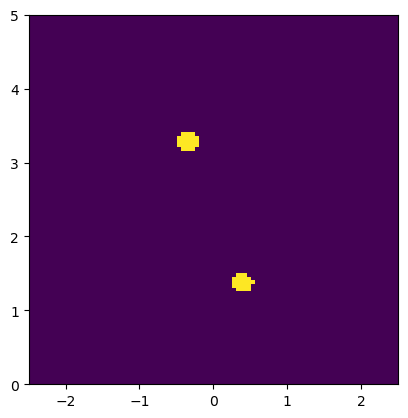

In [7]:
%%time

spheres = [arlo, *landmarks]
spheres = [[0.14, [-0.39139613, 3.64572008]], [0.14, [0.35163773, 1.71677392]]]


n = 100
Mx = np.linspace(2.5, -2.5, n)
Mz = np.linspace(0, 5, n)
X, Z = np.meshgrid(Mx, Mz)

def inSphere(a, r, c):
    (ax, ay) = a
    (cx, cy) = c
    return r > math.sqrt((ax-cx)**2 + (ay-cy)**2)

M = np.array([sum([1 if inSphere(a, *s) else 0 for s in spheres])
              for a in zip(X.flat, Z.flat)]).reshape(n,n)
plt.imshow(M, extent=[-2.5,2.5,0,5])

In [8]:
def sphereCollide(a, b, margin=0.1):
    ar, (ax, az) = a
    br, (bx, bz) = b
    return ar + br + margin < math.sqrt((ax-bx)**2 + (az-bz)**2)

sphereCollide((.225, (0,0)), (.14, (10,10)))

True

In [60]:
pos = (0,0)
angle = 0
print(pos, "_", angle)
for p in [(-1,1),(-1,2),(1,3),(1,5)]:
    d = math.dist(pos, p)
    angle = math.degrees(math.atan((pos[0]-p[0])/(pos[1]-p[1]))) - angle
    pos = p
    print(p, d, angle)

(0, 0) _ 0
(-1, 1) 1.4142135623730951 -45.0
(-1, 2) 1.0 45.0
(1, 3) 2.23606797749979 18.43494882292201
(1, 5) 2.0 -18.43494882292201


In [68]:
from itertools import accumulate

def movement(prev_state, p):
    prev, angle, d = prev_state
    return (p,
            math.degrees(math.atan((prev[0]-p[0])/(prev[1]-p[1]))) - angle,
            math.dist(prev, p))

points = [(-1,1),(-1,2),(1,3),(1,5)]
for _, turn, dist in accumulate(points, movement, initial=((0,0),0,0)):
    arlo.go_diff(60,60,) ...

((0, 0), 0, 0)
((-1, 1), -45.0, 1.4142135623730951)
((-1, 2), 45.0, 1.0)
((1, 3), 18.43494882292201, 2.23606797749979)
((1, 5), -18.43494882292201, 2.0)


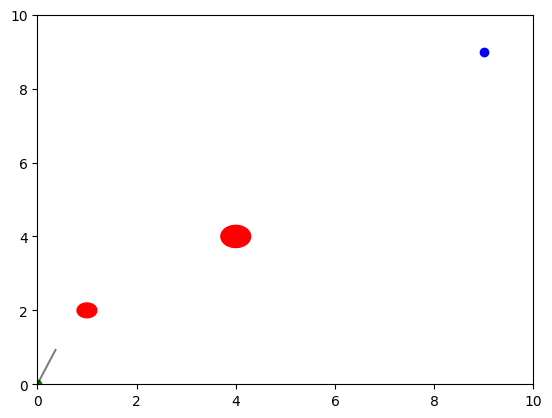

Goal reached in 51 iterations.
[[0, 0], [0.3661899833291318, 0.9305401098874837], [0.39991339829611927, 1.929971313764451], [1.2810622319461156, 2.402810327549535], [1.5153780213563304, 3.3749708651322265], [2.5141303434010656, 3.424908818737166], [3.326736494867541, 4.007722032896594], [2.982688898658296, 4.9466742422995225], [3.1559508907079477, 5.931550012186764], [3.9769749356982187, 6.502443625347581], [4.434743104766931, 7.391515221670104], [5.418874240342027, 7.214072532354167], [6.15218864287662, 7.893962219755979], [7.143138357648918, 7.759728607003054], [7.8243637569479665, 8.491802343282298], [8.584387329886578, 9.141697849173536], [9, 9]]



In [5]:
from RRT import *

start = (0, 0)
goal = (9, 9)
map_size = (10, 10)
obstacles = [(1, 2, 0.2), (4, 4, 0.3)]
rrt = RRT(start, goal, map_size, obstacles, step_size=1, max_iter=1000)

# Plot the initial state
rrt.plot_initial()

# Run the RRT algorithm
path = rrt.find_path()
print(path)
# Plot the final path if found
rrt.plot_final(path)

print()